### xlsx -> csv 파일로 변환

In [ ]:
import pandas as pd

# xlsx 파일 경로
xlsx_file_path = '/content/drive/MyDrive/Project_BeLife/data/clean_data.xlsx'

# csv 파일로 변환할 경로 및 파일 이름
csv_file_path = '/content/drive/MyDrive/Project_BeLife/data/clean_data.csv'

# xlsx 파일을 pandas DataFrame으로 읽기
df = pd.read_excel(xlsx_file_path)

# DataFrame을 csv 파일로 저장
df.to_csv(csv_file_path, index=False)

# 결과 출력
print(f"Conversion completed. CSV file saved at: {csv_file_path}")

# 데이터 불러오기

## 사용자 선호도평점 데이터 (rating_df)

- [필독] 수정 방향
  - 선호운동은 정제한 프로그램 현황 데이터와 연결 시켜야 함(선호운동의 종목-프로그램 테이블에서 추천해줄 1,2,3순위 지정하는 프로그래밍 추가 필요)
  - , 평균평점은 종목 카테고리별 프로그램 테이블 속성 가중치 계산 평균 값으로 수정해야 함

In [33]:
import pandas as pd
import chardet # 자동으로 인코딩을 감지

# 사용자가 선호운동을 평가한 점수에 대한 테이블
# 현재는 각 사용자가 직접 선호도 값을 입력했다고 가정

with open('/content/drive/MyDrive/Project_BeLife/data/sample_data.csv', 'rb') as f:
    result_f = chardet.detect(f.read())

encoding = result_f['encoding']

rating_df = pd.read_csv('/content/drive/MyDrive/Project_BeLife/data/sample_data.csv', encoding=encoding)
rating_df.head()

,사용자,건강상태,운동목표,연령대,거주지,선호빈도,선호시간대,선호인원수,선호운동,평균평점
0,1,디스크,심폐지구력향상,성인,성북구정릉제4동,주7회,무관,5명이하,무도및격투기,9.3
1,2,대사증후군,체형교정,청소년,종로구종로1.2.3.4가동,주1회,저녁,5명이상,구기및라켓류,9.4
2,3,혈압질환,심폐지구력향상,청소년,구로구고척제1동,주2회,오전,5명이상,민속스포츠,8.0
3,4,대사증후군,근력향상,노인,노원구상계제10동,주7회,무관,5명이하,무도및격투기,9.2
4,5,혈압질환,근력향상,노인,성동구금호1가동,주2회,오전,5명이상,체력단련및생활운동,5.9


## 정제한 프로그램 현황 데이터 (clean_data_df)





In [4]:
with open('/content/drive/MyDrive/Project_BeLife/data/clean_data.csv', 'rb') as p:
    result_p = chardet.detect(p.read())

encoding = result_p['encoding']

clean_data_df = pd.read_csv('/content/drive/MyDrive/Project_BeLife/data/clean_data.csv', encoding=encoding)
clean_data_df.head()

,시설명,종목명,프로그램명,대상,요일,시간,시설주소,지번주소,Unnamed: 8
0,영등포구민체육센터,삭제,영/유아 수영,유아,화목토,14:00~15:00,NaN,서울 영등포구 신길동 426-3,NaN
1,중랑문화체육관,삭제,(가임女)오전수영AB+헬스,유아,월화수목금토,09:00~09:50,서울특별시 중랑구 사가정로72길 47,서울 중랑구 면목7동 519,NaN
2,중랑문화체육관,삭제,(가임女)오전수영CD+헬스,유아,월화수목금토,10:00~10:50,서울특별시 중랑구 사가정로72길 47,서울 중랑구 면목7동 519,NaN
3,은평청소년수련관,삭제,10.영유아를위한수영,유아,화목,14:00~14:50,NaN,서울 은평구 응암2동 산 6-46,NaN
4,은평청소년수련관,삭제,10.영유아를위한수영,유아,화목,15:00~15:50,NaN,서울 은평구 응암2동 산 6-46,NaN


# EDA

### 각 테이블 열 이름 확인

In [21]:
print("선호도 테이블 열 이름 확인:", rating_df.columns)
print("프로그램 정제 테이블 열 이름 확인:", clean_data_df.columns)

선호도 테이블 열 이름 확인: Index(['사용자', '건강상태', '운동목표', '연령대', '거주지', '선호빈도', '선호시간대', '선호인원수', '선호운동',
       '평균평점'],
      dtype='object')
프로그램 정제 테이블 열 이름 확인: Index(['시설명', '종목명', '프로그램명', '대상', '요일', '시간', '시설주소', '지번주소', 'Unnamed: 8'], dtype='object')


### 각 테이블 고유 속성 정보

In [35]:
print("<rating_df>")
print("고유 사용자 수:", len(rating_df["사용자"].unique()))
print("선호하는 종목명 개수:", len(rating_df["선호운동"].unique()))
print("리스트:", rating_df["선호운동"].unique(), '\n')

print("<clean_data_df>")
print("실제 종목명 개수:", len(clean_data_df["종목명"].unique()))
print("리스트:", clean_data_df["종목명"].unique(), '\n')
print("실제 프로그램명 개수:", len(clean_data_df["프로그램명"].unique()))
print("리스트:", clean_data_df["프로그램명"].unique(), '\n')

<rating_df>
고유 사용자 수: 1000
선호하는 종목명 개수: 6
리스트: ['무도및격투기' '구기및라켓류' '민속스포츠' '체력단련및생활운동' '기타' '레저스포츠'] 

<clean_data_df>
실제 종목명 개수: 28
리스트: ['삭제' '구기 및 라켓' '체력단련 및 생활운동' '발레' '체조' '요가' '에어로빅' '레저' '태권도' '무도'
 '아쿠아로빅' '장애인체육' '스피드스케이트' '유도' '라켓볼' '암벽등반' '보드(S-BOARD)' '무용' '댄스' '태보'
 '하키' '피겨스케이팅' '승마' '민속' '합기도' '재활' '특수체육' '라인댄스'] 

실제 프로그램명 개수: 1436
리스트: [' 영/유아 수영' '(가임女)오전수영AB+헬스' '(가임女)오전수영CD+헬스' ... '토구' '초등 체육'
 '교구를 이용한 신체활동[기타체육]'] 



## 평점 분포 확인 그래프

### 나눔고딕 설치 (한 번만 실행)

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 그래프 그리기

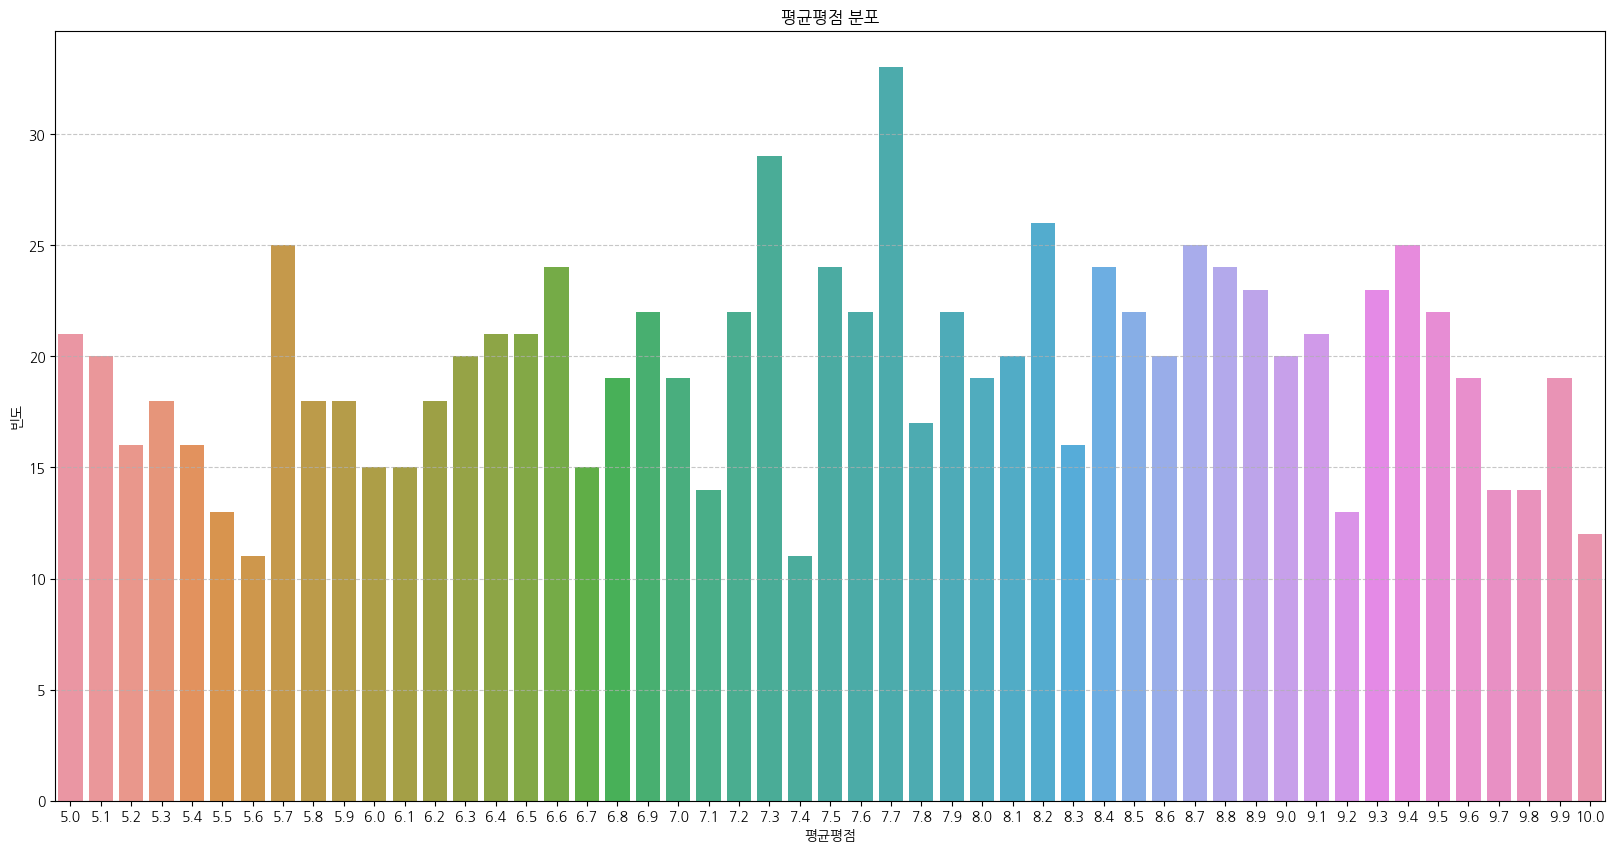

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 평점 순서 지정 (오름차순)
rating_order = sorted(rating_df["평균평점"].unique())

# Seaborn countplot에 order 매개변수 추가
sns.countplot(x=rating_df["평균평점"], order=rating_order)

# 그래프 꾸미기
object_cnt = rating_df["평균평점"].value_counts()

# 주석 추가
for x, y, z in zip(object_cnt.index, object_cnt.values, object_cnt.values / object_cnt.sum() * 100):
    plt.annotate(f"{y}\n({round(z, 2)}%)", xy=(x - 1, y + 40), textcoords="data", ha="center", fontsize=12)

# x축, y축 레이블 추가
plt.xlabel("평균평점")
plt.ylabel("빈도")

# 그래프 제목 추가
plt.title("평균평점 분포")

# 그리드 표시
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()


# Matrix Factorization Modeling

- [필독] 수정 방향
  - 선호도 테이블 가중치를 반영한 평균평점의 id를 설정해야함: program_id
  - 모델 학습 속성 테이블 새로 저장 후 불러와야 함: 사용자id, 선호운동id(종목+프로그래명 병합), 평균평점

### SVD에 사용하는 surprise 패키지 설치 (한번만 실행)

In [7]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163483 sha256=79cfa2f4547e52eb463049ea13610eda1019ec292a3583f86187228fdab5f020
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## MF-based (SVD) 모델 학습

In [9]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import time
from surprise import accuracy

# Reader, Dataset 오브젝트로 학습용 데이터셋 생성 및 분리


reader = Reader(rating_scale=(5,10)) 	#1~5점 사이의 rating점수가 있다는 것을 알려줌
data = Dataset.load_from_df(rating_df[["사용자", "선호운동", "평균평점"]], reader)
trainset, testset = train_test_split(data, test_size=0.25)


param_list = [10, 50, 100, 150, 200]
rmse_list_by_factors = []
ttime_list_by_factors = []

# n_factor depth에 따른 RMSE 확인
for n in param_list:
   train_start = time.time()
   algo = SVD(n_factors=n)
   algo.fit(trainset)
   train_end = time.time()
   print("training time of model: %.2f seconds" % (train_end-train_start))
   print(f"RMSE of test dataset in SVD model, n_factors={n}")

   # 모델 평가
   predictions = algo.test(testset)
   rmse_list_by_factors.append(accuracy.mse(predictions))
   ttime_list_by_factors.append(train_end-train_start)
   print("-"*20)

print("searching n_factors is finish.")

training time of model: 0.03 seconds
RMSE of test dataset in SVD model, n_factors=10
MSE: 1.9457
--------------------
training time of model: 0.04 seconds
RMSE of test dataset in SVD model, n_factors=50
MSE: 1.9458
--------------------
training time of model: 0.05 seconds
RMSE of test dataset in SVD model, n_factors=100
MSE: 1.9490
--------------------
training time of model: 0.08 seconds
RMSE of test dataset in SVD model, n_factors=150
MSE: 1.9514
--------------------
training time of model: 0.12 seconds
RMSE of test dataset in SVD model, n_factors=200
MSE: 1.9499
--------------------
searching n_factors is finish.


## n_factor에 따른 RMSE 시각화

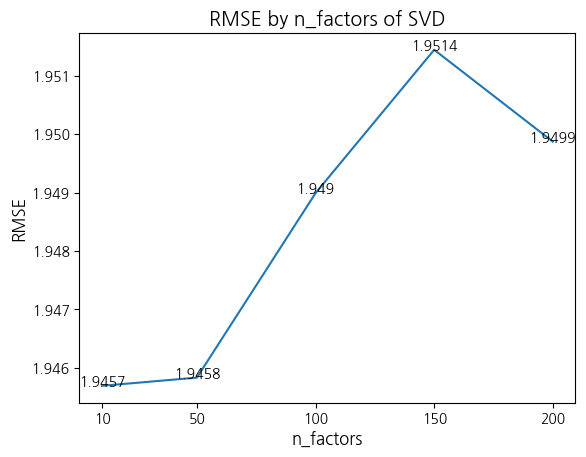

In [11]:
import matplotlib.pyplot as plt

# plt의 plot 함수로 결과 시각화
plt.plot(param_list, rmse_list_by_factors)
plt.title("RMSE by n_factors of SVD", fontsize=14) # 평점수가 많을수록, RMSE 값은 작아지고, 값이 작을수록 정확도가 높음 (0.1~1.0 사이)
plt.xticks(param_list)
plt.xlabel("n_factors", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

for x, y in zip(param_list, rmse_list_by_factors):
    plt.annotate(f'{round(y, 4)}', xy=(x, y), textcoords="data", ha="center")

plt.show()

## 최종 RMSE 평가

In [12]:
algo = SVD(n_factors=50)
algo.fit(trainset)
predictions = algo.test(testset)
acc = accuracy.rmse(predictions)
acc

RMSE: 1.3948


1.3948130483386854

## 실시간 업데이트를 고려해서 SVD 모델 학습 (사용자 등록 순서대로 진행)

In [15]:
rating_df['사용자'].quantile(q=0.8, interpolation='nearest') # 8:2로 나눌 수 있는 사용자 기준탐색 ---> 800 (1000개 기준)

800

In [17]:
train_df = rating_df[rating_df["사용자"]< 800][["사용자", "선호운동", "평균평점"]]
test_df = rating_df[rating_df["사용자"]>= 800][["사용자", "선호운동", "평균평점"]]

# 추출한 학습 데이터셋으로 SVD 모델 학습
data = Dataset.load_from_df(train_df, reader=reader)
train_data = data.build_full_trainset()

algo = SVD(n_factors=10)
algo.fit(train_data)

## 테스트 및 평가

In [27]:
# 예측할 부분 (rating이 없는) 데이터만 추출
test_data = train_data.build_anti_testset()


predictions = algo.test(test_data)

# test 평가를 위해 선택하지 않은 프로그램의 예상 점수를 dictionary 형태로 추출
estimated_unselected_dict = {}

for uid, iid, _, predicted_rating, _ in predictions:
  if uid in estimated_unselected_dict:
    estimated_unselected_dict[uid].append((iid, predicted_rating))
  else:
    estimated_unselected_dict[uid] = [(iid, predicted_rating)]

# K파라미터 별 추천 결과 평가 및 시각화

In [24]:
# user_watch_dict_list_test -> user_select_dict_list_test
# actual_watch_list  -> actual_select_list
# estimated_unwatched_dict -> estimated_unselected_dict
# remaining_movies -> remaining_programs

In [30]:
# 사용자 정보를 담고 있는 DataFrame

# 전체 사용자 정보 참조/불러오기
user_select_dict_list_test = pd.DataFrame({
    '사용자': rating_df["사용자"],
    '선택한 선호운동': rating_df["선호운동"]
})

def get_map_topk(k):
    user_metric = []
    for user in estimated_unselected_dict:
        estimated_list = estimated_unselected_dict[user].copy()
        estimated_list.sort(key=lambda tup: tup[1], reverse=True)
        try:
            top_k_prefer_list = [program[0] for program in estimated_list[:k]]

            # user_select_dict_list_test가 DataFrame이고, index에 user가 존재하는지 확인
            if isinstance(user_select_dict_list_test, pd.DataFrame) and user in user_select_dict_list_test.index:
                actual_select_list = user_select_dict_list_test.loc[user].values.tolist()

                # 예측 값의 길이가 0인 경우 처리
                if len(top_k_prefer_list) == 0:
                    continue

                # top_k_prefer_list의 길이가 k보다 작은 경우 처리
                if len(top_k_prefer_list) < k:
                    remaining_programs = set(program[0] for program in estimated_list[k:]) - set(top_k_prefer_list)
                    top_k_prefer_list.extend(list(remaining_programs)[:k - len(top_k_prefer_list)])

                user_metric.append((user, top_k_prefer_list, actual_select_list))
            else:
                print(f"사용자 {user}에 대한 데이터가 올바르게 로드되지 않았습니다.")
        except Exception as e:
            print(f"사용자 {user}에 대한 오류: {str(e)}")
            # 필요한 대로 오류 처리

    precision_list = []
    for user in user_metric:
        predictive_values = user[1]
        actual_values = set(user[2])
        tp = [pv for pv in predictive_values if pv in actual_values]
        if len(predictive_values) > 0:
            precision = len(tp) / len(predictive_values)
            precision_list.append(precision)

    if len(precision_list) > 0:
        return sum(precision_list) / len(precision_list)
    else:
        return 0

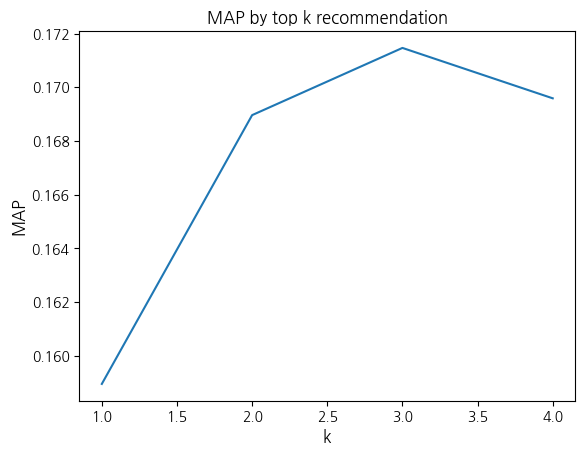

In [32]:
k_param_list = range(1,5)
map_list = []
for k in k_param_list:
  map_list.append(get_map_topk(k))

plt.plot(k_param_list, map_list)
plt.title('MAP by top k recommendation')# 대부분 추천시스템의 MAP는 0.1~0.2 사이
plt.ylabel('MAP', fontsize=12)
plt.xlabel('k', fontsize=12)
plt.show()

# [필독] 추가 코드 작성 필요한 내용
- 선호운동 - 종목명 - 프로그램명 데이터 범주화 및 테이블 생성&저장 코드 작성
- 추천결과 데이터 프레임 확인
- 추천 결과 프린트
- (오픈AI API관련) 새로운 사용자의 데이터 입력시 추천시스템 작동하게 하기
- (오픈AI API관련) 추천결과 내보내게 
- Good job!